In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [ ]:
def extract_points(img, number=25, thickness=10):
  gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

  corners = cv2.goodFeaturesToTrack(gray, number, 0.01, 10)
  corners = np.int0(corners)

  for i in corners:
    x,y = i.ravel()
    cv2.circle(img, (x,y), thickness, 255, -1)
  
  return img, corners

In [ ]:
def map_points(img, corners1, corners2, accuracy=30, thickness=10):
  new_img = img.copy()
  counter = 0
  for i in corners1:
    min_dist = accuracy**2
    best_j = None
    flag = False
    for j in corners2:
      dist = (i[0][0]-j[0][0])**2 + (i[0][1]-j[0][1])**2
      # print(dist)

      if dist <= min_dist:
          min_dist = dist
          best_j = j[0]
          flag=True
      
    if flag:
      new_img = cv2.line(new_img, tuple(i[0]), tuple(best_j), (0, 255, 255), thickness)
      counter += 1
    
  return new_img, counter


Вращение объекта при неподвижной камере

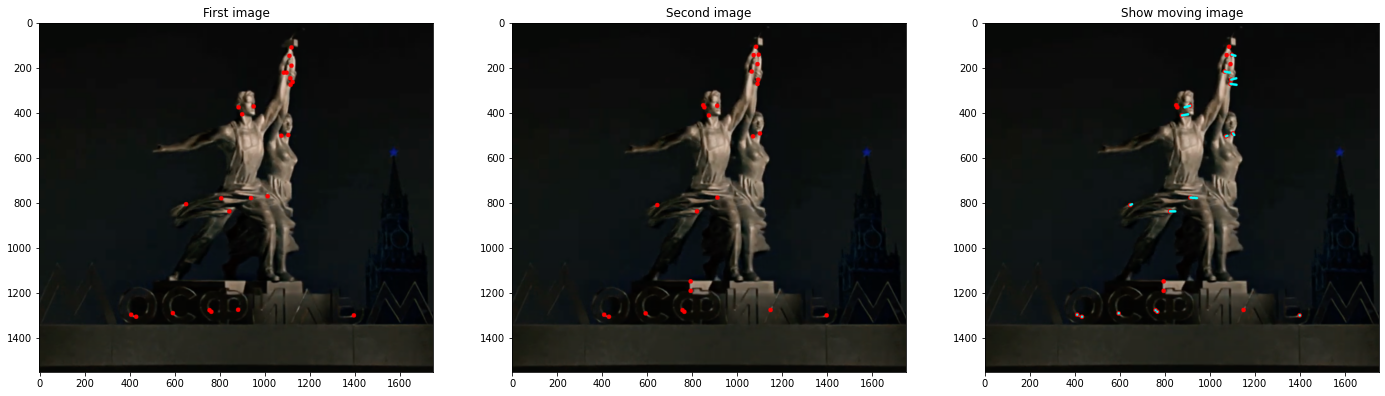

Overall points 25, found - 17, accuracy - 68.0%


In [ ]:
img1 = cv2.imread('Mosflm1.png')
img1 = img1[450:2000, 1000:2750]

img2 = cv2.imread('Mosfilm2.png')
img2 = img2[450:2000, 1000:2750]

img_points1, corners1 = extract_points(img1)
img_points2, corners2 = extract_points(img2)

moving_img, counter = map_points(img2, corners1, corners2)

fig, axes = plt.subplots(1, 3)

axes[0].imshow(img_points1)
axes[0].set_title('First image')

axes[1].imshow(img_points2)
axes[1].set_title('Second image')

axes[2].imshow(moving_img)
axes[2].set_title('Show moving image')

fig.set_figwidth(24)
fig.set_figheight(12)

plt.show()

print(f'Overall points 25, found - {counter}, accuracy - {counter/min(len(corners1), len(corners2)) * 100}%')

Движение строго вправо в студийных условиях

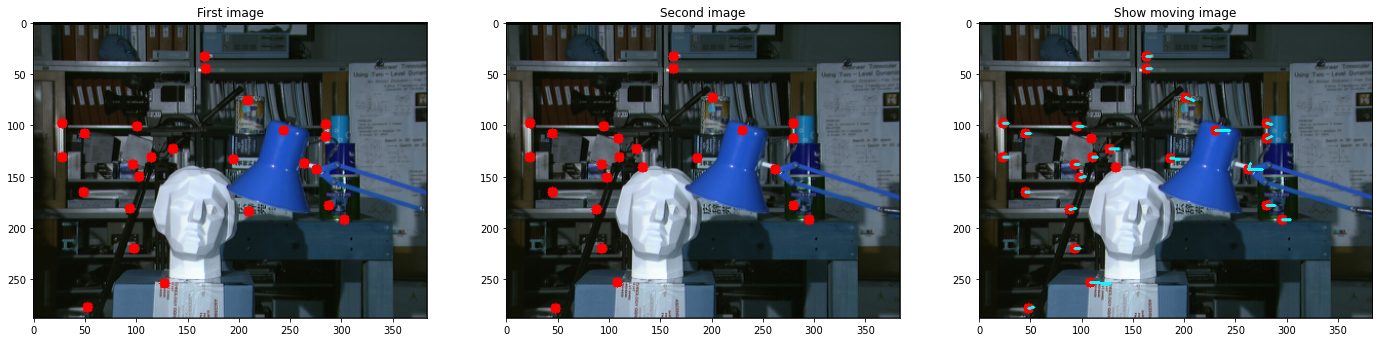

Overall points 25, found - 24, accuracy - 96.0%


In [ ]:
img1 = cv2.imread('left.png')
img2 = cv2.imread('right.png')

img_points1, corners1 = extract_points(img1, thickness=5)
img_points2, corners2 = extract_points(img2, thickness=5)

moving_img, counter = map_points(img2, corners1, corners2, thickness=2)

fig, axes = plt.subplots(1, 3)

axes[0].imshow(img_points1)
axes[0].set_title('First image')

axes[1].imshow(img_points2)
axes[1].set_title('Second image')

axes[2].imshow(moving_img)
axes[2].set_title('Show moving image')

fig.set_figwidth(24)
fig.set_figheight(12)

plt.show()

print(f'Overall points 25, found - {counter}, accuracy - {counter/25 * 100}%')

In [ ]:
def extract_moving_and_show_result(img1, img2):
    img_points1, corners1 = extract_points(img1, number=40)
    img_points2, corners2 = extract_points(img2, number=40)

    moving_img, counter = map_points(img2, corners1, corners2, accuracy=100)

    fig, axes = plt.subplots(1, 3)

    axes[0].imshow(img_points1)
    axes[0].set_title('First image')

    axes[1].imshow(img_points2)
    axes[1].set_title('Second image')

    axes[2].imshow(moving_img)
    axes[2].set_title('Show moving image')

    fig.set_figwidth(12)
    fig.set_figheight(6)

    plt.show()

    print(f'Overall points 25, found - {counter}, accuracy - {counter/min(len(corners1), len(corners2)) * 100}%')

Движение по спирали вниз

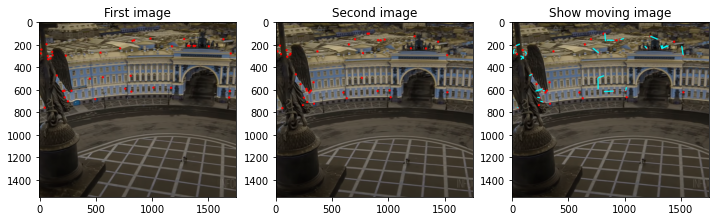

Overall points 25, found - 30, accuracy - 75.0%


In [ ]:
img1 = cv2.imread('Dvorts1.png')
img1 = img1[450:2000, 1000:2750]

img2 = cv2.imread('Dvorts2.png')
img2 = img2[450:2000, 1000:2750]

extract_moving_and_show_result(img1, img2)

Движение вверх

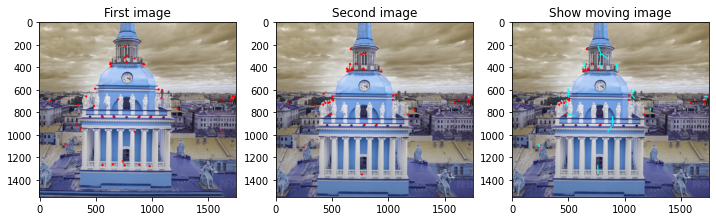

Overall points 25, found - 29, accuracy - 72.5%


In [ ]:
img1 = cv2.imread('Adm1.png')
img1 = img1[450:2000, 1000:2750]

img2 = cv2.imread('Adm2.png')
img2 = img2[450:2000, 1000:2750]

extract_moving_and_show_result(img1, img2)

Отдаление

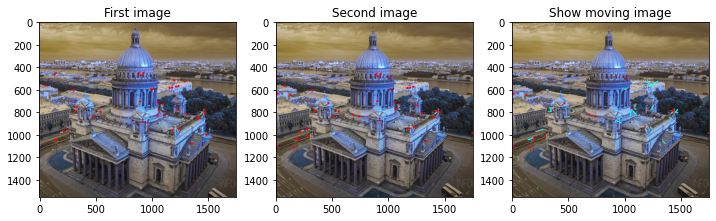

Overall points 25, found - 38, accuracy - 95.0%


In [ ]:
img1 = cv2.imread('Isaak1.png')
img1 = img1[450:2000, 1000:2750]

img2 = cv2.imread('Isaak2.png')
img2 = img2[450:2000, 1000:2750]

extract_moving_and_show_result(img1, img2)